In [ ]:
tel=c1/(6*1000); # ok tamanho de elemento
qsi1=0; qsi2=0; qsi3=0; # primeiro nó do elemento padrao (TET10)
#coord_u _ coordenada do ponto de velocidade que se quer calcular


function [u,pmed,Zmed]=velocidade_fp_bem_novo(coord_u,k1,rho1,c1,w,qsi1,qsi2,qsi3,dir,tel)


coord_el_med=[0,0,0;...
              1,0,0;...
              0,1,0;...
              0,0,1;...
              0.5,0,0;...
              0.5,0.5,0;...
              0,0.5,0;
              0,0,0.5;...
              0.5,0,0.5;...
              0,0.5,0.5];
coord_el_med=coord_el_med-[qsi1,qsi2,qsi3];  # translação necessária no espaço
coord_el_med=coord_el_med.*tel+coord_u; # translação necessária no espaço com elemento redimensionado
 

#função de forma T10 - Ziekwineski OKOK - CORRIGIDO e verificado COM Figura "tetra_Zienkiewicz_TET10_.png" (*)
 N=[(1-qsi1-qsi2-qsi3)*(2*(1-qsi1-qsi2-qsi3)-1)
   qsi1*(2*qsi1-1)
   qsi2*(2*qsi2-1)
   qsi3*(2*qsi3-1)
   4*qsi1*(1-qsi1-qsi2-qsi3)
   4*qsi1*qsi2
   4*qsi2*(1-qsi1-qsi2-qsi3)
   4*qsi3*(1-qsi1-qsi2-qsi3)
   4*qsi3*qsi1
   4*qsi2*qsi3];


# Ziekwineski (*)
# derivada da função de forma T10 - Ziekwineski OKOK - refeita, de acordo COM Figura "tetra_Zienkiewicz_TET10_.png"
GNi=[4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 4*qsi1 - 1, 0, 0, 4 - 4*qsi2 - 4*qsi3 - 8*qsi1, 4*qsi2, -4*qsi2, -4*qsi3, 4*qsi3, 0;...
   4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 0, 4*qsi2 - 1, 0, -4*qsi1, 4*qsi1, 4 - 8*qsi2 - 4*qsi3 - 4*qsi1, -4*qsi3, 0, 4*qsi3;...
   4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 0, 0, 4*qsi3 - 1, -4*qsi1, 0, -4*qsi2, 4 - 4*qsi2 - 8*qsi3 - 4*qsi1, 4*qsi1, 4*qsi2];


## Jacobiano e derivada da pressão
Ja = GNi*coord_el_med; B = J\GNi; # compute the B matrix - B é o gradiente

# AQUI PRECISA ACHAR AS 10 PRESSOES (p_total_nodais - vetor de 10 informações) das coordenadas já definidas #coord_el_med

delPmed=B*p_total_nodais;

pmed=transpose(p_total_nodais)*(N); # calculada na coordenada qsi1 qsi2 qsi3   # 

u=(delPmed)./(1i*w*rho1); # convençãao exp(-j\omega t)
Zmed=pmed./(dir*u);  # IMPEDANCIA

In [1]:
# Importando bibliotecas

import femder as fd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from femder.FEM_3D import  p2SPL

Default Plotly renderer: jupyterlab


In [54]:
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_150_500_0_5.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_500_900_0_5.pkl","rb") as arquivo:
  obj2 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_900_2k_0_5.pkl","rb") as arquivo:
  obj3 = pickle.load(arquivo)




In [48]:
print(obj1.pN.shape)
print(obj2.pN.shape)
print(obj3.pN.shape)


(701, 1387)
(801, 6145)
(2201, 53264)


In [51]:
obj3.freq[200]

1000.0

In [61]:
import numpy as np

tel=obj3.c0/(6*8000) # ok tamanho de elemento
qsi1=0; qsi2=0; qsi3=0; # primeiro nó do elemento padrao (TET10)
ind = np.argwhere(obj3.domain_index_surf==8)[:,0]
con = obj3.elem_surf[ind,:] # use unique p pegar os nós da superficie e as coord
coord_mat = obj3.nos[np.unique(con),:] #p freq mais alta


#coord_mat = coord_tag6[0,:]#coord_u _ coordenada do ponto de velocidade que se quer calcular

In [62]:

coord_el_med=np.array([[0,0,0],
                       [1,0,0],
                       [0,1,0],
                       [0,0,1],
                       [0.5,0,0],
                       [0.5,0.5,0],
                       [0,0.5,0],
                       [0,0,0.5],
                       [0.5,0,0.5],
                       [0,0.5,0.5]])

coord_el_med=coord_el_med-np.array([qsi1,qsi2,qsi3])  # translação necessária no espaço
coord_el_med=coord_el_med*tel+np.array([0.7138333, 0.7302398, 0.02525241])#coord_mat[0,:] # translação necessária no espaço com elemento redimensionado

R = fd.Receiver()
R.coord = coord_el_med

In [25]:

path_to_geo = "G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\minicamara_menor\maisEspesso_comVol.geo"

AP = fd.AirProperties(c0 = 343)
fmax = 2000 #2300
fmin = 150
AC = fd.AlgControls(AP,fmin,fmax,0.5)
S = fd.Source("spherical")
S.coord = np.array([[1.222,0.15,0.2]])
#S.q = np.array(q.T.ravel()[1500:3700])
S.q = np.array([0.001])

In [45]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=6,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

In [8]:
#função de forma T10 - Ziekwineski OKOK - CORRIGIDO e verificado COM Figura "tetra_Zienkiewicz_TET10_.png" (*)
N = np.array([[(1-qsi1-qsi2-qsi3)*(2*(1-qsi1-qsi2-qsi3)-1)],
               [qsi1*(2*qsi1-1)],
               [qsi2*(2*qsi2-1)],
               [qsi3*(2*qsi3-1)],
               [4*qsi1*(1-qsi1-qsi2-qsi3)],
               [4*qsi1*qsi2],
               [4*qsi2*(1-qsi1-qsi2-qsi3)],
               [4*qsi3*(1-qsi1-qsi2-qsi3)],
               [4*qsi3*qsi1],
               [4*qsi2*qsi3]])

In [9]:
# derivada da função de forma T10 - Ziekwineski OKOK - refeita, de acordo COM Figura "tetra_Zienkiewicz_TET10_.png"
GNi= np.array([[4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 4*qsi1 - 1, 0, 0, 4 - 4*qsi2 - 4*qsi3 - 8*qsi1, 4*qsi2, -4*qsi2, -4*qsi3, 4*qsi3, 0],
               [4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 0, 4*qsi2 - 1, 0, -4*qsi1, 4*qsi1, 4 - 8*qsi2 - 4*qsi3 - 4*qsi1, -4*qsi3, 0, 4*qsi3],
               [4*qsi1 + 4*qsi2 + 4*qsi3 - 3, 0, 0, 4*qsi3 - 1, -4*qsi1, 0, -4*qsi2, 4 - 4*qsi2 - 8*qsi3 - 4*qsi1, 4*qsi1, 4*qsi2]])



3.5117914321842764e-08
0.007145803976447384
0.007145852479896876
0.007145831130908186
0.0035728873098067825
0.005052859987496386
0.003572935813290926
0.003572914464327472
0.0050528448914196385
0.005052879188548257


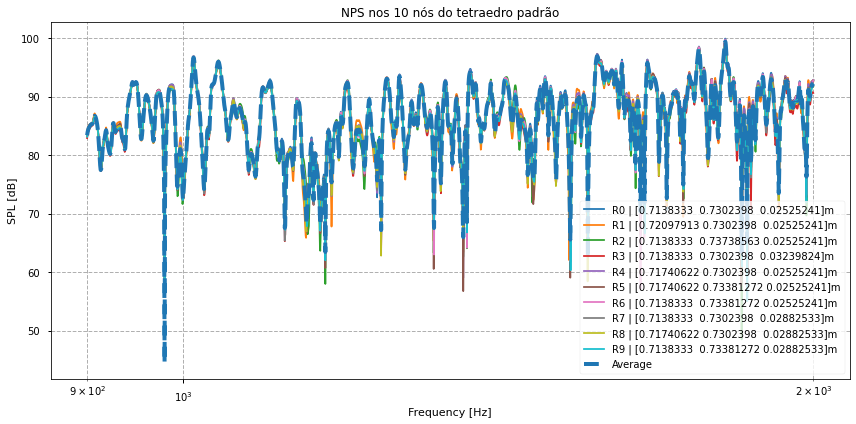

In [63]:
# AQUI PRECISA ACHAR AS 10 PRESSOES (p_total_nodais - vetor de 10 informações) das coordenadas já definidas #coord_el_med
obj3.evaluate(R)
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj3.R.coord)==1:
  plt.semilogx(obj3.freq, p2SPL(obj3.pR), linestyle='-', label=f'R | {obj3.R.coord[0]}m')
else:
  for i in range(len(obj3.R.coord)):
      plt.semilogx(obj3.freq, p2SPL(obj3.pR[:,i]), linestyle='-', label=f'R{i} | {obj3.R.coord[i,:]}m')

if len(obj3.R.coord) > 1:
  pR_med = np.mean(obj3.pR,axis=1)
  plt.semilogx(obj3.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
plt.title('NPS nos 10 nós do tetraedro padrão')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

In [64]:
## Jacobiano e derivada da pressão
Ja = GNi@coord_el_med
B = (np.linalg.inv(Ja)@GNi) # compute the B matrix - B é o gradiente
p_total_nodais = obj3.pR.T # PRESSÃO NOS n nós do elemento de volume
delPmed=B@p_total_nodais# para todas as frequencias fazer um for, ver como fazer operando matrizes
pmed=p_total_nodais*N # calculada na coordenada qsi1 qsi2 qsi3   # 

dir = np.array([0,0,-1]).reshape((1,3))
delPmed1 = dir@delPmed
u=(delPmed1)/(1j*obj3.w*obj3.rho0) # convençãao exp(-j\omega t)

Zmed=pmed[0]/(u) # IMPEDANCIA

In [33]:
# Boundary Conditions
AP = fd.AirProperties(c0 = 343)
fmax = 2000 #2000
fmin = 900
AC = fd.AlgControls(AP,fmin,fmax,0.5)
BC = fd.BC(AC,AP) #[2,3,4,5,6,7]
#BC.normalized_admittance(6,sup.admittance)
BC.delany(6,RF=12100, d=0.025, model='miki')

In [18]:
obj3.freq[200]

1000.0

In [65]:
Zmed[0,200]

(274.0138513707044+207.05776139841518j)

In [66]:
1/BC.mu[6][200]

(190.70338291917884-667.5493070659984j)